<a href="https://colab.research.google.com/github/danilocouto1/Analise-de-dados-da-ANATEL/blob/main/Analise_de_dados_da_ANATEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Telefonia Móvel no Brasil com Dados da Anatel

## 1. Contexto do Projeto

A Agência Nacional de Telecomunicações (Anatel) disponibiliza dados públicos que nos permitem mergulhar na evolução do mercado de telefonia móvel no Brasil. Com essas informações, podemos investigar tendências, entender a distribuição geográfica dos acessos e acompanhar a adoção de novas tecnologias (do 2G ao 5G, incluindo M2M).

Neste projeto, vamos simular a jornada de um analista de dados explorando as seguintes questões:

*   Qual a trajetória do número total de linhas móveis ao longo do tempo?
*   Quais regiões (estados e DDDs) concentram a maior parte dos acessos?
*   Como as diferentes tecnologias de sinal (2G, 3G, 4G, 5G e M2M) evoluíram e qual o cenário atual?
*   Existem desigualdades regionais significativas no acesso à telefonia móvel?

Vamos começar carregando e explorando os dados!

## 2. Preparação do Ambiente

Primeiro, vamos importar a biblioteca `pandas`, nossa ferramenta essencial para manipulação e análise de dados em formato tabular (DataFrames) no Python.

In [ ]:
import pandas as pd

## 3. Carregando os Dados
IMPORTAR O ARQUIVO NO COLAB, ELE VAI ESTAR NO GITHUB:https://github.com/danilocouto1/Analise-de-dados-da-ANATEL/blob/main/br_anatel_telefonia_movel_ddd.csv
Agora, carregamos o dataset da Anatel (`br_anatel_telefonia_movel_ddd.csv`) para um DataFrame do pandas, que vamos chamar de `df`. Assim, transformamos os dados brutos em uma estrutura organizada pronta para ser explorada.

In [ ]:
df = pd.read_csv("br_anatel_telefonia_movel_ddd.csv")

## 4. Primeiras Impressões: Estrutura e Estatísticas Descritivas

Para começar a entender nossos dados, vamos dar uma olhada na sua estrutura e em algumas estatísticas básicas.

*   `df.info()` nos mostra os nomes das colunas, a quantidade de valores não nulos em cada uma e o tipo de dado. Isso é crucial para identificar dados faltantes ou tipos incorretos.
*   `df.describe()` calcula estatísticas descritivas para as colunas numéricas, como média, desvio padrão, mínimo, máximo e quartis. É um resumo rápido da distribuição dos dados.
*   `df.select_dtypes(include=["number"]).corr()` calcula a matriz de correlação entre as colunas numéricas. Isso nos ajuda a identificar possíveis relacionamentos lineares entre as variáveis.

In [ ]:
print(df.info())
print(df.describe())
df.select_dtypes(include=["number"]).corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55043 entries, 0 to 55042
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ano         55043 non-null  int64 
 1   mes         55043 non-null  int64 
 2   sigla_uf    55043 non-null  object
 3   ddd         55043 non-null  int64 
 4   tecnologia  55043 non-null  object
 5   sinal       55043 non-null  object
 6   acessos     55043 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ MB
None
         ano    mes    ddd    acessos
count 55,043 55,043 55,043     55,043
mean   2,015      6     56    644,946
std        3      3     27  1,592,912
min    2,009      1     11          1
25%    2,012      4     33     10,534
50%    2,015      6     55     94,819
75%    2,017      9     81    678,086
max    2,021     12     99 25,718,371


,ano,mes,ddd,acessos
ano,1,-0,0,0
mes,-0,1,0,-0
ddd,0,0,1,-0
acessos,0,-0,-0,1


## 5. Explorando Valores Únicos

Vamos verificar os valores únicos em algumas colunas categóricas e de tempo para entender o escopo do nosso dataset:

*   Quais anos e meses estão cobertos pelos dados?
*   Quais Unidades da Federação (UFs) estão representadas?
*   Quais tecnologias de telefonia móvel foram registradas?
*   Quais tipos de sinal estão presentes nos dados?

Essa exploração inicial nos dá uma visão clara do que podemos analisar.

In [ ]:
print("Período")
print("Anos:", df["ano"].unique())
print("Meses:", df["mes"].sort_values().unique())

print("UFs")
print(df["sigla_uf"].unique())

print("Tecnologias")
print(df["tecnologia"].unique())

print("Sinais")
print(df["sinal"].sort_values().unique())

Período
Anos: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Meses: [ 1  2  3  4  5  6  7  8  9 10 11 12]
UFs
['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
Tecnologias
['CDMA IS 95' 'CDMA2000' 'Dados > 256kbps' 'Dados até 256kbps' 'GSM'
 'WCDMA' 'AMPS' 'TDMA' 'Dados' 'Dados Banda Larga' 'M2M' 'LTE'
 'M2M Padrão' 'M2M Especial']
Sinais
['1G' '2G' '3G' '4G' 'M2M']


## 6. Análise Temporal: Evolução do Total de Acessos

Vamos investigar como o número total de acessos móveis evoluiu ao longo do tempo.

*   Calculamos o total geral de acessos em todo o período.
*   Agrupamos os dados por ano e somamos os acessos para observar a tendência anual.

**Insight Potencial:** Observando o total de acessos por ano, podemos identificar um ponto de virada por volta de 2015, onde o crescimento parece desacelerar ou até mesmo iniciar um declínio gradual. Isso pode indicar uma saturação do mercado.

In [ ]:
total_acessos = df["acessos"].sum()
print("Total de acessos móveis no período:", total_acessos)

total_por_ano = df.groupby("ano")["acessos"].sum()
print("Total de acessos móveis por ano:",total_por_ano)

print("\n Qual é o Insight?")

Total de acessos móveis no período: 35499757839
Total de acessos móveis por ano: ano
2009    1782073804
2010    2243930332
2011    2649833103
2012    3062038127
2013    3200421274
2014    3316019008
2015    3336560872
2016    3033841803
2017    2897380045
2018    2811642305
2019    2738887910
2020    2733486609
2021    1693642647
Name: acessos, dtype: int64

 Qual é o Insight?


## 7. Distribuição Geográfica: Acessos por UF

Agora, vamos analisar como os acessos móveis se distribuem entre os estados brasileiros.

*   Agrupamos os dados por `sigla_uf` e somamos os acessos para cada estado.
*   Ordenamos os resultados para destacar os estados com mais (`head(10)`) e menos (`tail(10)`) acessos.
*   Para facilitar a leitura de números grandes, ajustamos a formatação de exibição do pandas.
*   Calculamos o percentual de acessos por UF em relação ao total geral para entender a concentração de mercado em cada estado.

**Insight Potencial:** Essa análise nos revelará quais estados lideram em número de acessos e onde a densidade de linhas móveis é menor, evidenciando possíveis desigualdades regionais.

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

acessos_por_uf = (
    df.groupby("sigla_uf")
    ["acessos"].sum()
    .reset_index()
    .sort_values("acessos", ascending=False)
)
print("Maior acessos por UF:")
print(acessos_por_uf.head(10))

print("Menor acessos por UF:")
print(acessos_por_uf.tail(10))


print("\n Qual é o insight?")

Maior acessos por UF:
   sigla_uf     acessos
25       SP  9163735365
10       MG  3436914973
18       RJ  3132548939
4        BA  2230384263
17       PR  2110647460
22       RS  2074399842
15       PE  1557198327
5        CE  1375413375
8        GO  1123091133
13       PA  1122224908
Menor acessos por UF:
   sigla_uf    acessos
2        AM  541390550
16       PI  488987256
11       MS  485216668
1        AL  484300128
24       SE  338789874
20       RO  289829078
26       TO  242809090
0        AC  117395671
3        AP  115079327
21       RR   70829741

 Qual é o insight?


## 8. Distribuição Geográfica: Acessos por DDD

Descendo para um nível mais granular, vamos analisar a distribuição dos acessos por Código de Área (DDD).

*   Agrupamos os dados por `sigla_uf` e `ddd`, somando os acessos para cada combinação.
*   Calculamos o percentual de acessos por DDD em relação ao total geral.
*   Exibimos os 10 DDDs com o maior número de acessos.

**Insight Potencial:** Esta análise nos permite identificar as áreas urbanas e regiões metropolitanas com maior concentração de acessos, detalhando a distribuição geográfica dentro dos estados.

In [ ]:
total_geral = acessos_por_uf["acessos"].sum()

acessos_por_uf["percentual_%"] = (acessos_por_uf["acessos"] / total_geral) * 100

print("Total de acessos por UF:")
print(acessos_por_uf.head(10))

Total de acessos por UF:
   sigla_uf     acessos  percentual_%
25       SP  9163735365            26
10       MG  3436914973            10
18       RJ  3132548939             9
4        BA  2230384263             6
17       PR  2110647460             6
22       RS  2074399842             6
15       PE  1557198327             4
5        CE  1375413375             4
8        GO  1123091133             3
13       PA  1122224908             3


## 9. Análise Tecnológica: Evolução dos Tipos de Sinal

Vamos explorar a dinâmica das diferentes tecnologias de sinal (2G, 3G, 4G, M2M) ao longo dos anos.

*   Agrupamos os dados por `ano` e `sinal`, somando os acessos para cada combinação.
*   Ordenamos os resultados por ano e acessos para facilitar a visualização da dominância de cada tecnologia em diferentes períodos.

**Insight Potencial:** Esta análise é fundamental para entender a transição entre as gerações de tecnologia móvel, observando quais tecnologias estão em declínio e quais estão em ascensão.

In [ ]:
acessos_por_ddd = (
    df.groupby(["sigla_uf", "ddd"])["acessos"]
    .sum()
    .reset_index()
    .sort_values("acessos", ascending=False)
)

total_geral = acessos_por_ddd["acessos"].sum()
acessos_por_ddd["percentual_%"] = (acessos_por_ddd["acessos"] / total_geral) * 100

print("Total de acessos por DDD: \n")
print(acessos_por_ddd.head(10))

print("\n Qual é o insight?")

Total de acessos por DDD: 

   sigla_uf  ddd     acessos  percentual_%
60       SP   11  5050758349            14
46       RJ   21  2434784103             7
20       MG   31  1428746919             4
34       PE   81  1250437997             4
68       SP   19  1210281407             3
52       RS   51  1126168821             3
5        BA   71   881137701             2
10       CE   85   868082852             2
16       GO   62   829505123             2
12       DF   61   824234409             2

 Qual é o insight?


## 10. Comparativo Tecnológico: 2010 vs 2020

Para ter uma visão mais clara da mudança tecnológica em uma década, vamos filtrar os dados e comparar a distribuição dos acessos por tipo de sinal especificamente para os anos de 2010 e 2020.

**Insight Potencial:** A comparação direta entre esses dois anos destacará a mudança significativa na participação de mercado das tecnologias mais antigas (como 2G e 3G) em contraste com o crescimento de tecnologias mais recentes (como 4G).

In [ ]:
acessos_sinal_ano = (
    df.groupby(["ano", "sinal"])["acessos"]
    .sum()
    .reset_index()
    .sort_values(["ano", "acessos"], ascending=[True, False])
)

print("Total de acessos por ano e sinal:")
print(acessos_sinal_ano)

print("\n Qual é o insight?")

Total de acessos por ano e sinal:
     ano sinal     acessos
1   2009    2G  1733954911
2   2009    3G    48055748
0   2009    1G       63145
4   2010    2G  2070329765
5   2010    3G   173591403
3   2010    1G        9164
6   2011    2G  2309987709
7   2011    3G   339845394
8   2012    2G  2389328455
9   2012    3G   628092173
10  2012   M2M    44617499
11  2013    2G  2144184965
12  2013    3G   959328084
14  2013   M2M    92393566
13  2013    4G     4514659
15  2014    2G  1632394109
16  2014    3G  1529520260
18  2014   M2M   109855242
17  2014    4G    44249397
20  2015    3G  1961528138
19  2015    2G  1065204242
21  2015    4G   178882810
22  2015   M2M   130945682
24  2016    3G  1697612566
23  2016    2G   682813877
25  2016    4G   510408983
26  2016   M2M   143006377
28  2017    3G  1260179077
29  2017    4G   996396263
27  2017    2G   473123923
30  2017   M2M   167680782
33  2018    4G  1423241478
32  2018    3G   848790734
31  2018    2G   332227110
34  2018   M2M   2073

## 11. Salvando Resultados Intermediários

É uma boa prática salvar os resultados de análises importantes para uso futuro ou compartilhamento. Aqui, salvamos dois dataframes em arquivos CSV:

*   `acessos_sinal_ano_2010_2020.csv`: Contém o comparativo de acessos por sinal entre 2010 e 2020.
*   `anatel_filter.csv`: Uma versão filtrada do dataframe original com as colunas mais relevantes para análises subsequentes.

In [ ]:
acessos_sinal_ano_2010_2020 = acessos_sinal_ano[acessos_sinal_ano["ano"].isin([2010, 2020])]

print("\nTotal de acessos em 2010 e 2020:")
print(acessos_sinal_ano_2010_2020)


Total de acessos em 2010 e 2020:
     ano sinal     acessos
4   2010    2G  2070329765
5   2010    3G   173591403
3   2010    1G        9164
40  2020    4G  1948777636
39  2020    3G   446584534
38  2020    2G   338124439


## 12. Visualização: Tendência Anual de Acessos

Para visualizar a tendência identificada na análise temporal, geramos um gráfico de linha do total de acessos móveis por ano.

*   Utilizamos a biblioteca `matplotlib` para criar o plot.
*   O eixo X representa o ano e o eixo Y o total de acessos.
*   O gráfico nos permite observar facilmente os períodos de crescimento, estabilidade e eventual declínio no número total de linhas.

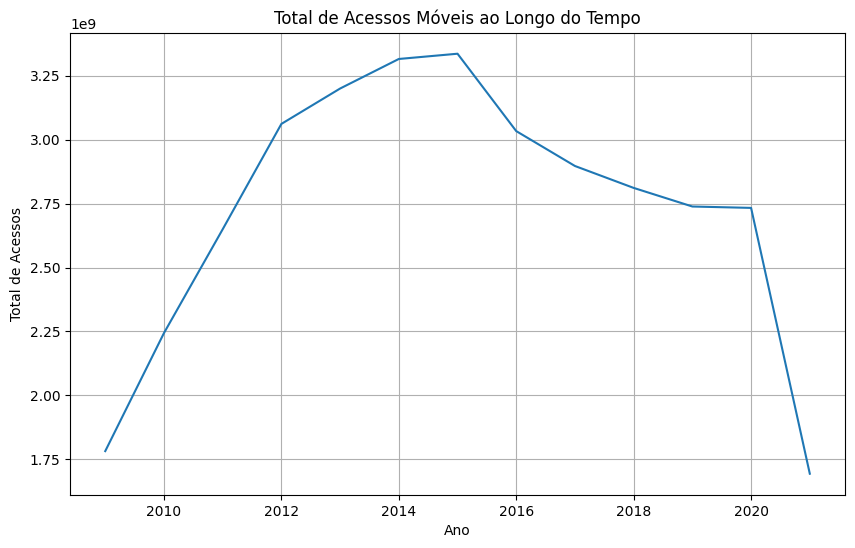

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(total_por_ano.index, total_por_ano.values)
plt.title("Total de Acessos Móveis ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Total de Acessos")
plt.grid(True)
plt.show()

## 13. Visualização: Concentração de Acessos por Estado

Para complementar a análise geográfica por UF, criamos um gráfico de barras.

*   Cada barra representa um estado (`sigla_uf`).
*   A altura da barra indica o total de acessos nesse estado.
*   O gráfico de barras facilita a comparação visual da concentração de mercado entre os diferentes estados brasileiros.

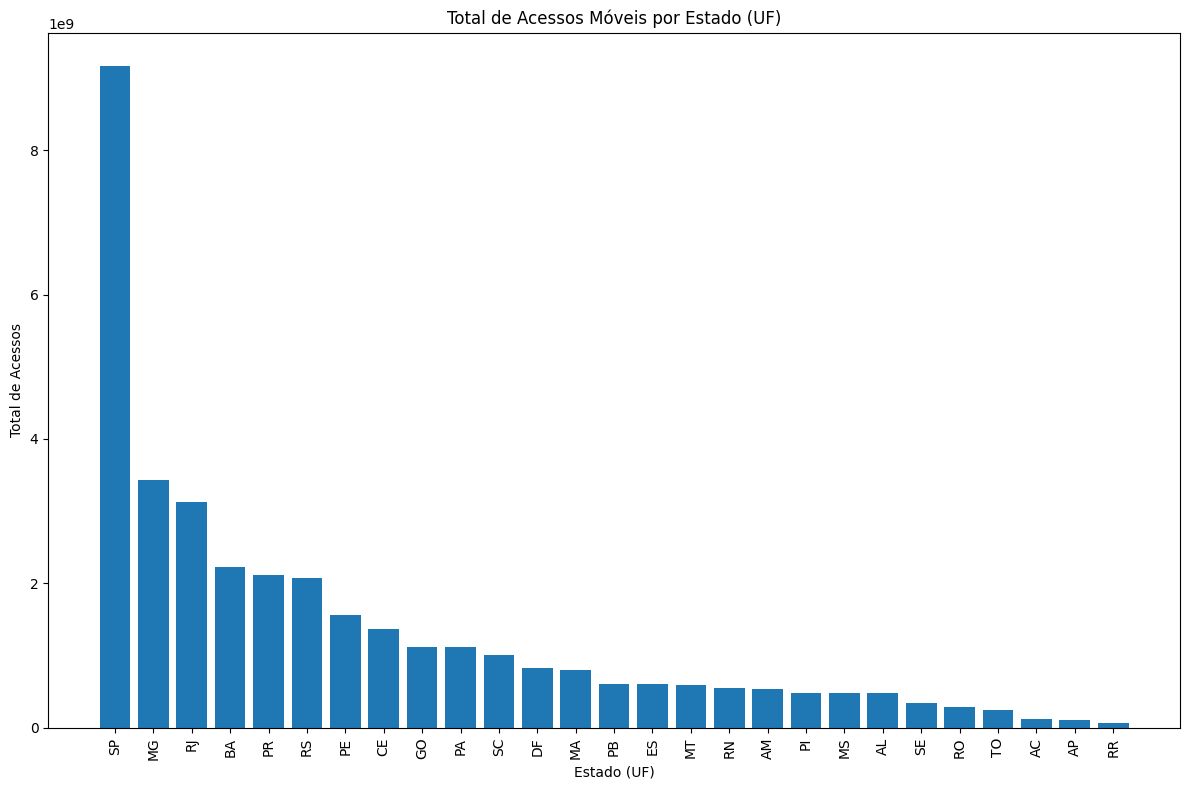

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(acessos_por_uf['sigla_uf'], acessos_por_uf['acessos'])
plt.title("Total de Acessos Móveis por Estado (UF)")
plt.xlabel("Estado (UF)")
plt.ylabel("Total de Acessos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 14. Visualização: Evolução de Cada Tecnologia de Sinal

Para detalhar a evolução tecnológica, geramos gráficos de linha separados para cada tipo de sinal ('2G', '3G', '4G', 'M2M').

*   Iteramos sobre os sinais de interesse.
*   Para cada sinal, filtramos os dados e plotamos os acessos ao longo dos anos.
*   Esses gráficos nos permitem visualizar individualmente a trajetória de cada tecnologia, entendendo seu pico, declínio ou crescimento contínuo.

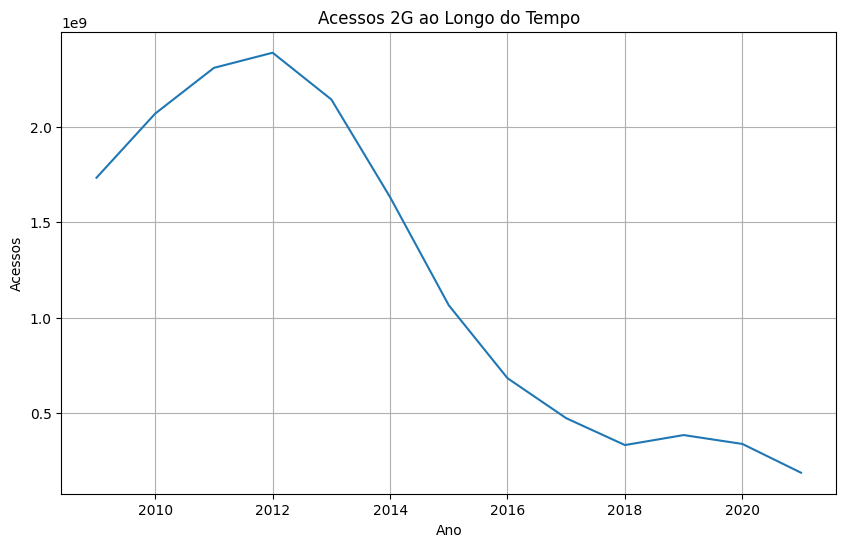

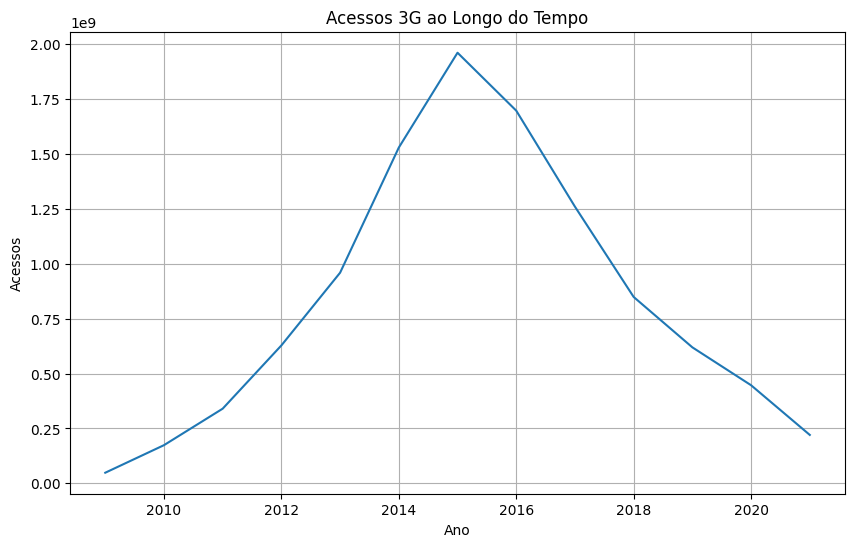

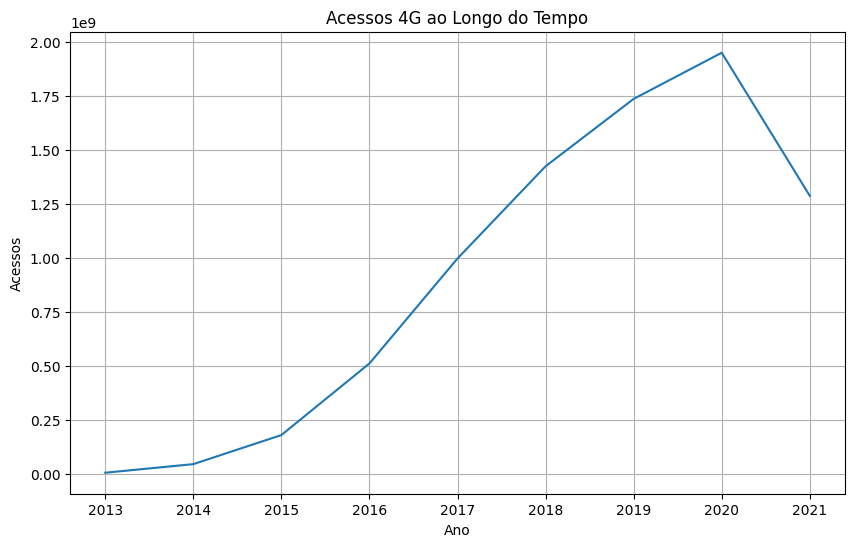

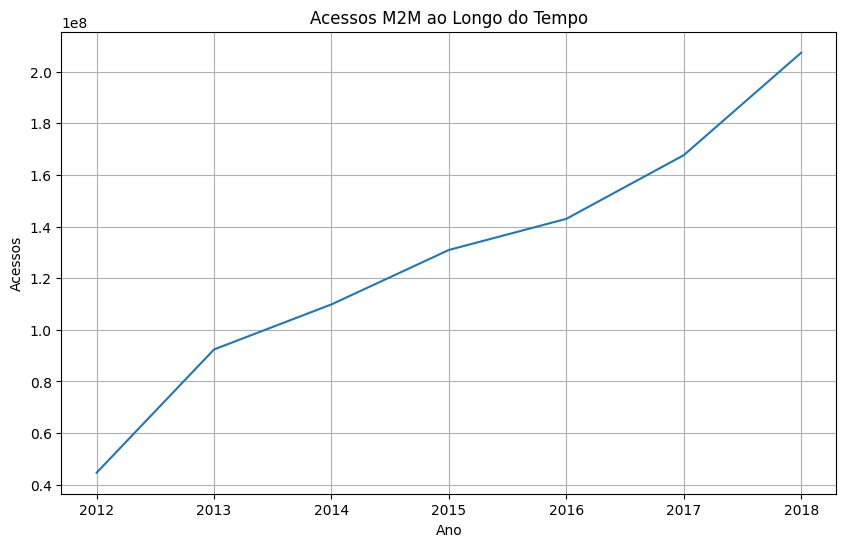

In [ ]:
import matplotlib.pyplot as plt

signals_to_plot = ['2G', '3G', '4G', 'M2M']

for signal in signals_to_plot:
    df_filtered = acessos_sinal_ano[acessos_sinal_ano['sinal'] == signal]
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['ano'], df_filtered['acessos'])
    plt.title(f"Acessos {signal} ao Longo do Tempo")
    plt.xlabel("Ano")
    plt.ylabel("Acessos")
    plt.grid(True)
    plt.show()

In [ ]:
acessos_sinal_ano_2010_2020.to_csv("acessos_sinal_ano_2010_2020.csv", index=False)

df[["ano","sigla_uf","ddd","sinal","tecnologia","acessos"]].to_csv("anatel_filter.csv", index=False)